In [1]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

In [6]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [7]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [9]:
start = dt.datetime(2018,5,1)
stop = dt.datetime(2018,6,30)

period = 'H1'

In [11]:
candles = cdr('EURUSD',start,stop,period)
data = candles.get_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1080 entries, 2018-04-29 21:00:00 to 2018-06-29 20:00:00
Data columns (total 8 columns):
BidOpen     1080 non-null float64
BidHigh     1080 non-null float64
BidLow      1080 non-null float64
BidClose    1080 non-null float64
AskOpen     1080 non-null float64
AskHigh     1080 non-null float64
AskLow      1080 non-null float64
AskClose    1080 non-null float64
dtypes: float64(8)
memory usage: 75.9 KB


In [12]:
""" Valores abiertos, altos, bajos y cerrados para los precios de oferta. """
data[data.columns[:4]].tail()

,BidOpen,BidHigh,BidLow,BidClose
2018-06-29 16:00:00,1.16768,1.16820,1.16731,1.16769
2018-06-29 17:00:00,1.16769,1.16826,1.16709,1.16781
2018-06-29 18:00:00,1.16781,1.16816,1.16668,1.16684
2018-06-29 19:00:00,1.16684,1.16792,1.16638,1.16774
2018-06-29 20:00:00,1.16774,1.16904,1.16758,1.16816


In [13]:
""" Valores abiertos, altos, bajos y cerrados para los precios de venta. """
data[data.columns[4:]].tail()

,AskOpen,AskHigh,AskLow,AskClose
2018-06-29 16:00:00,1.16769,1.16820,1.16732,1.16771
2018-06-29 17:00:00,1.16771,1.16827,1.16711,1.16782
2018-06-29 18:00:00,1.16782,1.16817,1.16669,1.16686
2018-06-29 19:00:00,1.16686,1.16794,1.16640,1.16775
2018-06-29 20:00:00,1.16775,1.16907,1.16760,1.16861


In [14]:
""" Calcula los precios de cierre medio de la oferta y pide precios de cierre. """
data['MidClose']=data[['BidClose','AskClose']].mean(axis=1)

In [15]:
""" Calcula dos SMA, uno para un intervalo de tiempo más corto, uno para uno más largo. """
data['SMA1']=data['MidClose'].rolling(30).mean()
data['SMA2']=data['MidClose'].rolling(100).mean()

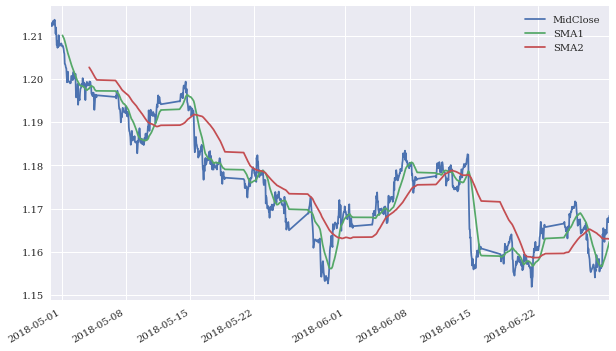

In [16]:
data[['MidClose','SMA1','SMA2']].plot(figsize=(10,6))